In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *

## What is DeepLearning?
Deep learning is a computer technique to extract and transform data–-with use cases ranging from human speech recognition to animal imagery classification–-by using multiple layers of neural networks. Each of these layers takes its inputs from previous layers and progressively refines them. The layers are trained by algorithms that minimize their errors and improve their accuracy. In this way, the network learns to perform a specified task.

> : A PhD is definitely not required. All that matters is a deep understanding of AI & ability to implement NNs in a way that is actually useful (latter point is what’s truly hard). Don’t care if you even graduated high school.

## What is Machine Learning?

Machine learning is, like regular programming, a way to get computers to complete a specific task. But how would we use regular programming to do what we just did in the last section: recognize dogs versus cats in photos? We would have to write down for the computer the exact steps necessary to complete the task.

Normally, it's easy enough for us to write down the steps to complete a task when we're writing a program. We just think about the steps we'd take if we had to do the task by hand, and then we translate them into code. For instance, we can write a function that sorts a list. In general, we'd write a function that looks something like (where *inputs* might be an unsorted list, and *results* a sorted list).


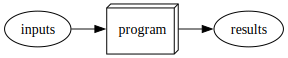

In [4]:
#hide_input
#caption A traditional program
#id basic_program
#alt Pipeline inputs, program, results
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

But for recognizing objects in a photo that's a bit tricky; what *are* the steps we take when we recognize an object in a picture? We really don't know, since it all happens in our brain without us being consciously aware of it!

Right back at the dawn of computing, in 1949, an IBM researcher named Arthur Samuel started working on a different way to get computers to complete tasks, which he called *machine learning*. In his classic 1962 essay "Artificial Intelligence: A Frontier of Automation", he wrote:

> : Programming a computer for such computations is, at best, a difficult task, not primarily because of any inherent complexity in the computer itself but, rather, because of the need to spell out every minute step of the process in the most exasperating detail. Computers, as any programmer will tell you, are giant morons, not giant brains.

His basic idea was this: instead of telling the computer the exact steps required to solve a problem, show it examples of the problem to solve, and let it figure out how to solve it itself. This turned out to be very effective: by 1961 his checkers-playing program had learned so much that it beat the Connecticut state champion! Here's how he described his idea (from the same essay as above):

> : Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.

There are a number of powerful concepts embedded in this short statement: 

- The idea of a "weight assignment" 
- The fact that every weight assignment has some "actual performance"
- The requirement that there be an "automatic means" of testing that performance,  
- The need for a "mechanism" (i.e., another automatic process) for improving the performance by changing the weight assignments

Let us take these concepts one by one, in order to understand how they fit together in practice. First, we need to understand what Samuel means by a *weight assignment*.

Weights are just variables, and a weight assignment is a particular choice of values for those variables. The program's inputs are values that it processes in order to produce its results—for instance, taking image pixels as inputs, and returning the classification "dog" as a result. The program's weight assignments are other values that define how the program will operate.

Since they will affect the program they are in a sense another kind of input, so we will update our basic picture in <<basic_program>> and replace it with <<weight_assignment>> in order to take this into account.

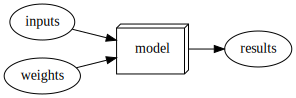

In [ ]:
#hide_input
#caption A program using weight assignment
#id weight_assignment
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

We've changed the name of our box from *program* to *model*. This is to follow modern terminology and to reflect that the *model* is a special kind of program: it's one that can do *many different things*, depending on the *weights*. It can be implemented in many different ways. For instance, in Samuel's checkers program, different values of the weights would result in different checkers-playing strategies. 

(By the way, what Samuel called "weights" are most generally referred to as model *parameters* these days, in case you have encountered that term. The term *weights* is reserved for a particular type of model parameter.)

Next, Samuel said we need an *automatic means of testing the effectiveness of any current weight assignment in terms of actual performance*. In the case of his checkers program, the "actual performance" of a model would be how well it plays. And you could automatically test the performance of two models by setting them to play against each other, and seeing which one usually wins.

Finally, he says we need *a mechanism for altering the weight assignment so as to maximize the performance*. For instance, we could look at the difference in weights between the winning model and the losing model, and adjust the weights a little further in the winning direction.

We can now see why he said that such a procedure *could be made entirely automatic and... a machine so programmed would "learn" from its experience*. Learning would become entirely automatic when the adjustment of the weights was also automatic—when instead of us improving a model by adjusting its weights manually, we relied on an automated mechanism that produced adjustments based on performance.

<<training_loop>> shows the full picture of Samuel's idea of training a machine learning model.

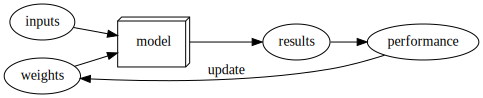

In [ ]:
#hide_input
#caption Training a machine learning model
#id training_loop
#alt The basic training loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

Notice the distinction between the model's *results*  (e.g., the moves in a checkers game) and its *performance* (e.g., whether it wins the game, or how quickly it wins). 

Also note that once the model is trained—that is, once we've chosen our final, best, favorite weight assignment—then we can think of the weights as being *part of the model*, since we're not varying them any more.

Therefore, actually *using* a model after it's trained looks like <<using_model>>.

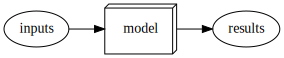

In [ ]:
#hide_input
#caption Using a trained model as a program
#id using_model
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

This looks identical to our original diagram in <<basic_program>>, just with the word *program* replaced with *model*. This is an important insight: *a trained model can be treated just like a regular computer program*.

> jargon: Machine Learning: The training of programs developed by allowing a computer to learn from its experience, rather than through manually coding the individual steps.

### What Is a Neural Network?
It's not too hard to imagine what the model might look like for a checkers program. There might be a range of checkers strategies encoded, and some kind of search mechanism, and then the weights could vary how strategies are selected, what parts of the board are focused on during a search, and so forth. But it's not at all obvious what the model might look like for an image recognition program, or for understanding text, or for many other interesting problems we might imagine.

What we would like is some kind of function that is so flexible that it could be used to solve any given problem, just by varying its weights. Amazingly enough, this function actually exists! It's the neural network, which we already discussed. That is, if you regard a neural network as a mathematical function, it turns out to be a function which is extremely flexible depending on its weights. A mathematical proof called the *universal approximation theorem* shows that this function can solve any problem to any level of accuracy, in theory. The fact that neural networks are so flexible means that, in practice, they are often a suitable kind of model, and you can focus your effort on the process of training them—that is, of finding good weight assignments.

But what about that process?  One could imagine that you might need to find a new "mechanism" for automatically updating weights for every problem. This would be laborious. What we'd like here as well is a completely general way to update the weights of a neural network, to make it improve at any given task. Conveniently, this also exists!

This is called *stochastic gradient descent* (SGD). We'll see how neural networks and SGD work in detail in <<chapter_mnist_basics>>, as well as explaining the universal approximation theorem. For now, however, we will instead use Samuel's own words: *We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.*

> J: Don't worry, neither SGD nor neural nets are mathematically complex. Both nearly entirely rely on addition and multiplication to do their work (but they do a _lot_ of addition and multiplication!). The main reaction we hear from students when they see the details is: "Is that all it is?"

In other words, to recap, a neural network is a particular kind of machine learning model, which fits right in to Samuel's original conception. Neural networks are special because they are highly flexible, which means they can solve an unusually wide range of problems just by finding the right weights. This is powerful, because stochastic gradient descent provides us a way to find those weight values automatically.

Having zoomed out, let's now zoom back in and revisit our image classification problem using Samuel's framework.

Our inputs are the images. Our weights are the weights in the neural net. Our model is a neural net. Our results are the values that are calculated by the neural net, like "dog" or "cat."

What about the next piece, an *automatic means of testing the effectiveness of any current weight assignment in terms of actual performance*? Determining "actual performance" is easy enough: we can simply define our model's performance as its accuracy at predicting the correct answers.

Putting this all together, and assuming that SGD is our mechanism for updating the weight assignments, we can see how our image classifier is a machine learning model, much like Samuel envisioned.

## What is a metric? 
A *metric* is a function that measures the quality of the model's predictions using the validation set, and will be printed at the end of each *epoch*. In this case, we're using `error_rate`, which is a function provided by fastai that does just what it says: tells you what percentage of images in the validation set are being classified incorrectly. Another common metric for classification is `accuracy` (which is just `1.0 - error_rate`). fastai provides many more, which will be discussed throughout this book.

The concept of a metric may remind you of *loss*, but there is an important distinction. The entire purpose of loss is to define a "measure of performance" that the training system can use to update weights automatically. In other words, a good choice for loss is a choice that is easy for stochastic gradient descent to use. But a metric is defined for human consumption, so a good metric is one that is easy for you to understand, and that hews as closely as possible to what you want the model to do. At times, you might decide that the loss function is a suitable metric, but that is not necessarily the case.

## What is Transfer Learning?

Using a pretrained model for a task different to what it was originally trained for is known as *transfer learning*. Unfortunately, because transfer learning is so under-studied, few domains have pretrained models available. For instance, there are currently few pretrained models available in medicine, making transfer learning challenging to use in that domain. In addition, it is not yet well understood how to use transfer learning for tasks such as time series analysis.

## What is CNN (Convolutional Neural Network)?
It's the current state-of-the-art approach to creating computer vision models. Their structure is inspired by how the human vision system works.

## What is Architecture?
The architecture only describes a *template* for a mathematical function; it doesn't actually do anything until we provide values for the millions of parameters it contains. Picking an architecture isn't a very important part of the deep learning process. It's something that academics love to talk about, but in practice it is unlikely to be something you need to spend much time on. There are some standard architectures that work most of the time, and in this case we're using one called _ResNet_ that we'll be talking a lot about during the book; it is both fast and accurate for many datasets and problems. The `34` in `resnet34` refers to the number of layers in this variant of the architecture (other options are `18`, `50`, `101`, and `152`). Models using architectures with more layers take longer to train, and are more prone to overfitting (i.e. you can't train them for as many epochs before the accuracy on the validation set starts getting worse). On the other hand, when using more data, they can be quite a bit more accurate.

## What is Fine-Tuning (Fitting the Model)?
This is the key to deep learning—determining how to fit the parameters of a model to get it to solve your problem. In order to fit a model, we have to provide at least one piece of information: how many times to look at each image **(known as number of *epochs*)**. The number of epochs you select will largely depend on how much time you have available, and how long you find it takes in practice to fit your model. If you select a number that is too small, you can always train for more epochs later.

But why is the method called `fine_tune`, and not `fit`? fastai actually *does* have a method called `fit`, which does indeed fit a model (i.e. look at images in the training set multiple times, each time updating the parameters to make the predictions closer and closer to the target labels). But in this case, we've started with a pretrained model, and we don't want to throw away all those capabilities that it already has. There are some important tricks to adapt a pretrained model for a new dataset—a process called *fine-tuning*.


> jargon: Fine-tuning: A transfer learning technique where the parameters (wights) of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining.

## What is the Head of the Model?
The *head* of a model is the part that is newly added to be specific to the new dataset. An *epoch* is one complete pass through the dataset. After calling `fit`, the results after each epoch are printed, showing the epoch number, the training and validation set losses (the "measure of performance" used for training the model), and any *metrics* you've requested (error rate, in this case).